# **Preprocesamiento de los Datos**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Cargar dataset
df = pd.read_csv("../data/credit_card_transactions.csv")

In [13]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [14]:
# Conversión de tipos
df['TransactionID'] = df['TransactionID'].astype(str)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Variables categóricas
categorical_cols = [
    'CardholderName',
    'MerchantName',
    'MCC',
    'Location',
    'Device',
    'TransactionSpeed'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

# IP como string
df['IPAddress'] = df['IPAddress'].astype(str)

# Etiqueta objetivo
df['Fraud'] = df['Fraud'].astype(int)

In [15]:
# Mostrar primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     10000 non-null  object        
 1   Time              10000 non-null  datetime64[ns]
 2   Amount            10000 non-null  float64       
 3   CardholderName    10000 non-null  category      
 4   MerchantName      10000 non-null  category      
 5   MCC               10000 non-null  category      
 6   Location          10000 non-null  category      
 7   Device            10000 non-null  category      
 8   IPAddress         10000 non-null  object        
 9   TransactionSpeed  10000 non-null  category      
 10  Fraud             10000 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.6+ MB


## Selección de variables para el modelado

In [17]:
# Definir características y variable objetivo
features = ['Amount', 'MCC', 'Location', 'Device', 'TransactionSpeed']
X = df[features]
y = df['Fraud']

## Codificación de variables categóricas

In [18]:
X_encoded = pd.get_dummies(X, columns=['MCC', 'Location', 'Device', 'TransactionSpeed'], drop_first=True)

# Verificación
print("Dimensiones después del encoding:", X_encoded.shape)
print("Columnas resultantes:", X_encoded.columns.tolist())

Dimensiones después del encoding: (10000, 12714)
Columnas resultantes: ['Amount', 'MCC_5411', 'MCC_5812', 'MCC_5942', 'MCC_5968', 'MCC_7299', 'Location_Aaronshire', 'Location_Abigailchester', 'Location_Abigailhaven', 'Location_Abigailstad', 'Location_Acevedoside', 'Location_Acostachester', 'Location_Acostafort', 'Location_Acostaport', 'Location_Adamborough', 'Location_Adamchester', 'Location_Adamland', 'Location_Adamsburgh', 'Location_Adamsfurt', 'Location_Adamshire', 'Location_Adamside', 'Location_Adamsshire', 'Location_Adamsstad', 'Location_Adamsville', 'Location_Adamview', 'Location_Adamville', 'Location_Adkinston', 'Location_Adrianberg', 'Location_Adrianbury', 'Location_Adrianfort', 'Location_Adrianview', 'Location_Adrienneport', 'Location_Adrienneshire', 'Location_Aguilarside', 'Location_Aguilartown', 'Location_Alanberg', 'Location_Alanbury', 'Location_Alanmouth', 'Location_Alanstad', 'Location_Alanton', 'Location_Alanview', 'Location_Alanville', 'Location_Alecborough', 'Location_

## Normalización de variables numéricas

In [19]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar la columna 'Amount'
X_encoded['Amount'] = scaler.fit_transform(X_encoded[['Amount']])

# Verificar resultado
print(X_encoded[['Amount']].describe())

             Amount
count  1.000000e+04
mean   2.614797e-16
std    1.000050e+00
min   -1.167889e+00
25%   -6.176304e-01
50%   -7.631660e-02
75%    4.621223e-01
max    9.653234e+00


## División del conjunto de datos en conjuntos

In [20]:
# Separamos en 70% entrenamiento y 30% restante
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.30, random_state=42, stratify=y)

# Separamos en 15% validación y 15% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Mostrar tamaños
print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Validación: {len(X_val)} muestras")
print(f"Prueba: {len(X_test)} muestras")

Entrenamiento: 7000 muestras
Validación: 1500 muestras
Prueba: 1500 muestras


## Manejar el desbalance de clases

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificamos el nuevo balance
print("Distribución después de SMOTE:")
print(y_train_resampled.value_counts())

Distribución después de SMOTE:
Fraud
0    6866
1    6866
Name: count, dtype: int64


# Modelado

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

MLPClassifier(max_iter=300, random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# Ajuste de hiperparámetros 
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPClassifier(max_iter=300), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=300),
             param_grid={'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50)],
                         'learning_rate_init': [0.001, 0.01]},
             scoring='accuracy')

# Evaluacion

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


--- GaussianNB ---
Accuracy: 0.7586666666666667
Recall (Fraude): 0.8275862068965517
Precision (Fraude): 0.06299212598425197
F1-Score (Fraude): 0.11707317073170732
Matriz de Confusión:
[[1114  357]
 [   5   24]]

--- MLPClassifier ---
Accuracy: 0.992
Recall (Fraude): 0.5862068965517241
Precision (Fraude): 1.0
F1-Score (Fraude): 0.7391304347826086
Matriz de Confusión:
[[1471    0]
 [  12   17]]


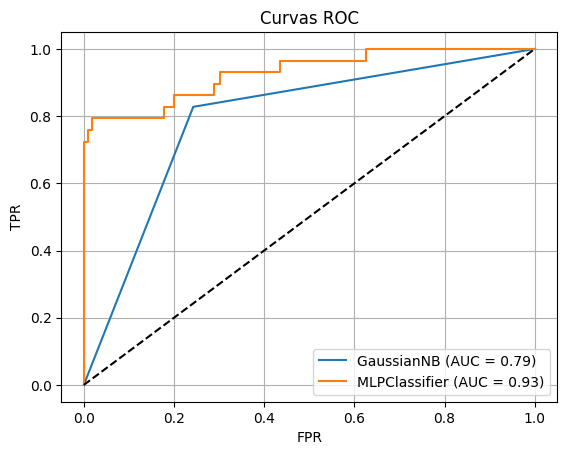

In [31]:
# Evaluación de GaussianNB
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluación de MLPClassifier
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Función para imprimir métricas
def evaluar_modelo(nombre, y_test, y_pred, y_proba):
    print(f"\n--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall (Fraude):", recall_score(y_test, y_pred, pos_label=1))
    print("Precision (Fraude):", precision_score(y_test, y_pred, pos_label=1))
    print("F1-Score (Fraude):", f1_score(y_test, y_pred, pos_label=1))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    
    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.2f})")

# Ejecutar para ambos modelos
evaluar_modelo("GaussianNB", y_test, y_pred_nb, y_proba_nb)
evaluar_modelo("MLPClassifier", y_test, y_pred_mlp, y_proba_mlp)

# Graficar curvas ROC
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()

# Identificar características importantes con permutation_importance

In [32]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(mlp, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importances = result.importances_mean
features = X_test.columns  # o la lista de nombres si es un array

# Mostrar las características más importantes
for i in importances.argsort()[::-1]:
    print(f"{features[i]}: {importances[i]:.4f}")